# Decision tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
from sklearn.tree import export_graphviz

In [19]:
conda install -c anaconda graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/david/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hecd8cb5_0         989 KB  anaconda
    ------------------------------------------------------------
                                           Total:         989 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> anaconda



conda-4.13.0         | 989 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import graphviz

In [4]:
import os

In [5]:
os.environ["PATH"] += os.pathsep + r'C:\Users\vivek\Downloads\graphviz-2.44.1-win32\Graphviz\bin'

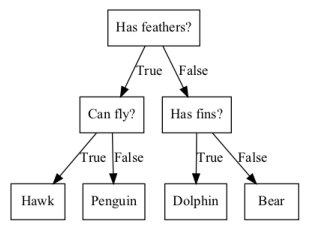

In [6]:
mglearn.plots.plot_animal_tree()

In [7]:
cancer = load_breast_cancer()

In [8]:
Xtrainc, Xtestc, ytrainc, ytestc = train_test_split(cancer.data, cancer.target)

In [9]:
tree = DecisionTreeClassifier()

In [10]:
print(f'train set score: {tree.fit(Xtrainc, ytrainc).score(Xtrainc, ytrainc)}')
print(f'test set score: {tree.fit(Xtrainc, ytrainc).score(Xtestc, ytestc)}')

train set score: 1.0
test set score: 0.9090909090909091


In [11]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)

In [12]:
print(f'train set score: {tree2.fit(Xtrainc, ytrainc).score(Xtrainc, ytrainc)}')
print(f'test set score: {tree2.fit(Xtrainc, ytrainc).score(Xtestc, ytestc)}')

train set score: 0.9835680751173709
test set score: 0.916083916083916


In [13]:
export_graphviz(tree2, out_file='tree.dot', class_names= ['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [14]:
file = open('tree.dot','r')
dot_graph = file.read()

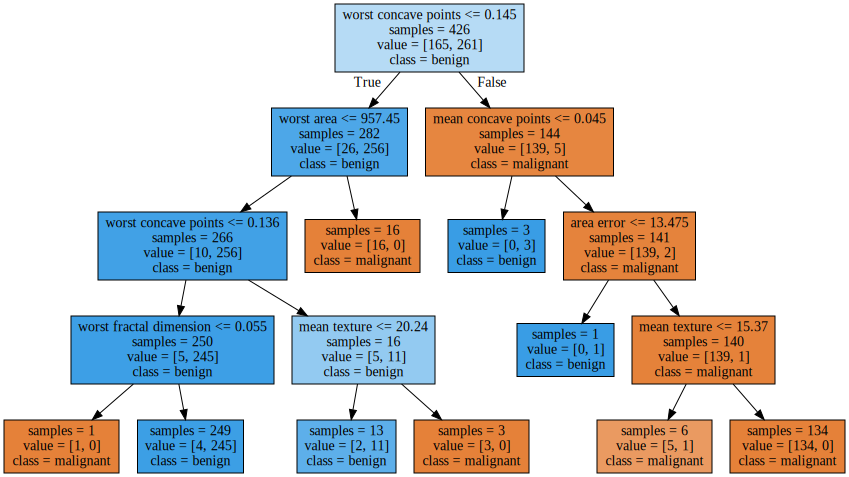

In [15]:
graphviz.Source(dot_graph)

In [16]:
from sklearn.tree import plot_tree

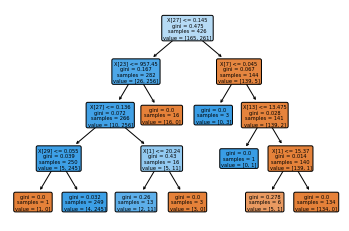

In [17]:
plot_tree(tree2,filled=True, rounded=True);

In [18]:
import numpy as np

In [19]:
def plot_feature_importance(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, color='red')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    fig=plt.gcf()
    fig.set_size_inches(10,8)

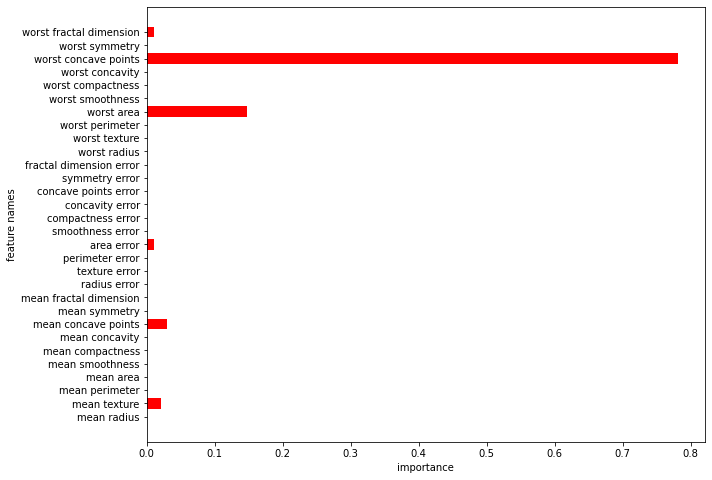

In [20]:
plot_feature_importance(tree2)

Feature importances: [0. 1.]


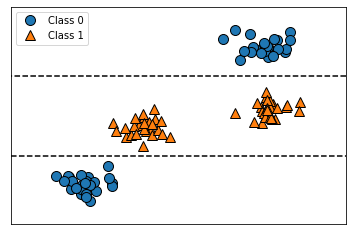

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()

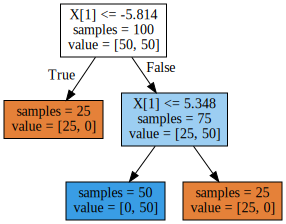

In [22]:
display(tree)

# RamdomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [24]:
X,y= make_moons(n_samples=100, noise=0.25, random_state=3)

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [26]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=2)
forest.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=2)

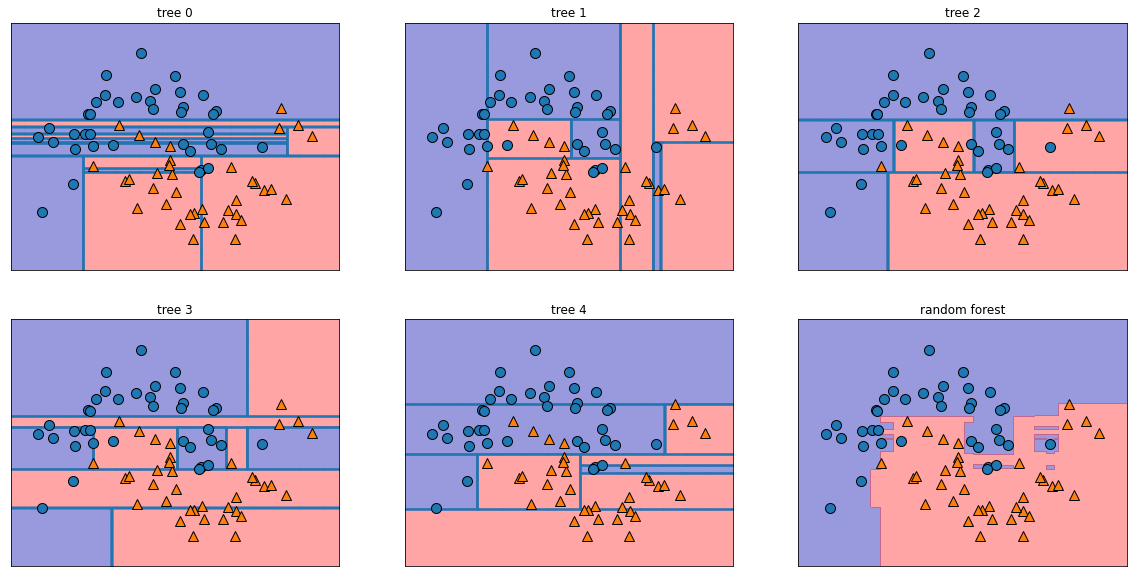

In [27]:
fig, axes = plt.subplots(2,3, figsize=(20,10), subplot_kw=dict(xticks=[], yticks=[]))
for i, (ax, tree) in enumerate(zip(axes.flat, forest.estimators_)):
    mglearn.plots.plot_tree_partition(Xtrain, ytrain, tree, ax=ax)
    ax.set_title(f'tree {i}')
mglearn.plots.plot_2d_separator(forest, Xtrain, ax=axes[-1, -1], alpha=0.4,fill=True)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(Xtrain[:, 0], Xtrain[:, 1], ytrain);

<AxesSubplot:>

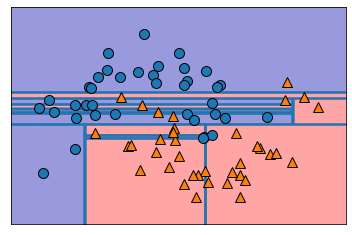

In [28]:
mglearn.plots.plot_tree_partition(Xtrain, ytrain, forest.estimators_[0])

In [29]:
newforest = RandomForestClassifier(n_estimators=100, random_state=0)

In [30]:
fit = newforest.fit(Xtrainc, ytrainc)

In [31]:
print(f'cancer train score {fit.score(Xtrainc, ytrainc)}')
print(f'cancer test score {fit.score(Xtestc,ytestc)}')

cancer train score 1.0
cancer test score 0.9440559440559441


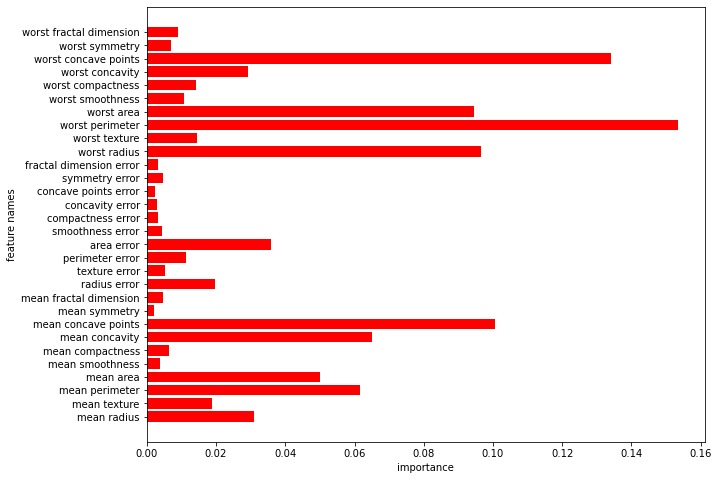

In [32]:
plot_feature_importance(fit)

# Gradient Boost Machine

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
Xtrainb,Xtestb,ytrainb,ytestb = train_test_split(cancer.data, cancer.target)

In [35]:
gb = GradientBoostingClassifier()

In [36]:
fitgb = gb.fit(Xtrainb,ytrainb)

In [37]:
print(f'train set score: {fitgb.score(Xtrainb,ytrainb)}')
print(f'test set score: {fitgb.score(Xtestb,ytestb)}')

train set score: 1.0
test set score: 0.9370629370629371


In [38]:
gb1 = GradientBoostingClassifier(max_depth=1)
gb1 = gb1.fit(Xtrainb,ytrainb)

In [39]:
print(f'train set score: {gb1.score(Xtrainb,ytrainb)}')
print(f'test set score: {gb1.score(Xtestb,ytestb)}')

train set score: 0.9929577464788732
test set score: 0.9300699300699301


In [43]:
gb2 = GradientBoostingClassifier(learning_rate=0.01)
gb2 = gb2.fit(Xtrainb,ytrainb)

In [44]:
print(f'train set score: {gb2.score(Xtrainb,ytrainb)}')
print(f'test set score: {gb2.score(Xtestb,ytestb)}')

train set score: 0.9929577464788732
test set score: 0.951048951048951


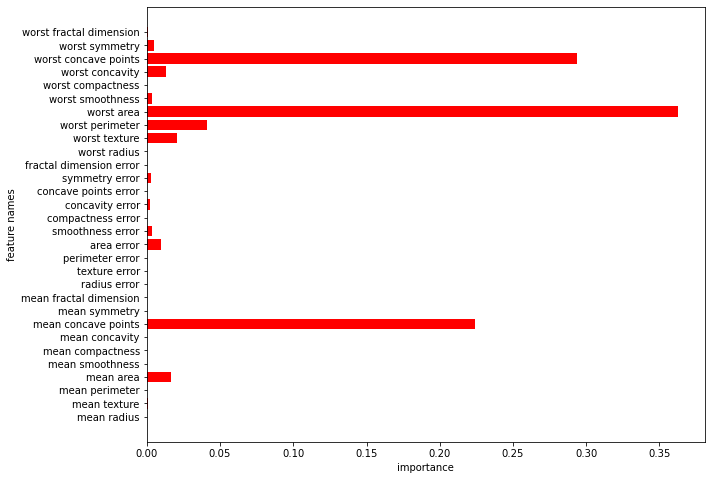

In [45]:
plot_feature_importance(gb1)